In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('data/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [15]:
df.columns = ['id', 'id filme', 'nota', 'duração']
df.head()

,id,id filme,nota,duração
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
df['nota'].head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

In [9]:
df['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [10]:
df2 = pd.read_csv('data/movies.csv')

In [11]:
df2.columns = ['id filme', 'título filme', 'gênero']
df2.head()

,id filme,título filme,gênero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
df2['gênero'].value_counts().head()

Drama             1053
Comedy             946
Comedy|Drama       435
Comedy|Romance     363
Drama|Romance      349
Name: gênero, dtype: int64

In [14]:
new_df = pd.read_csv('data/tags.csv')
new_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [15]:
new_df.columns = ['ID', 'ID_Filme', 'Palavra chave', 'tempo de duração']
new_df.head()

,ID,ID_Filme,Palavra chave,tempo de duração
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [16]:
new_df['ID_Filme'].head()

0    60756
1    60756
2    60756
3    89774
4    89774
Name: ID_Filme, dtype: int64

In [17]:
df.head()

,id,id filme,nota,duração
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Análise Exploratória
#### Analisando notas especificas por filme 

In [18]:
df.columns = ['Id', 'filmeId', 'nota', 'duração']
df.head()

,Id,filmeId,nota,duração
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
# pegando como parametro as notas do filme 1 e tirando a média

In [40]:
df.query("filmeId == 1").nota.mean()

3.9209302325581397

In [37]:
df.groupby("filmeId").mean().head()

,Id,nota,duração
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08


In [3]:
# gerando um data frame mais limpo, apenas com o valor da média das notas

In [38]:
media_por_filme = df.groupby("filmeId").nota.mean()
media_por_filme.head()


filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [25]:
# gerando histograma das notas


<AxesSubplot:ylabel='Frequency'>

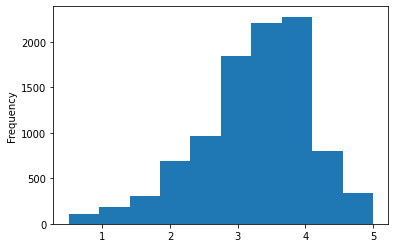

In [34]:
media_por_filme.plot(kind = 'hist')

In [36]:
media_por_filme.columns = ["id", "nota"]
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

In [23]:
data = media_por_filme.describe()

In [24]:
df4 = pd.DataFrame(data)


,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


Text(0.5, 1.0, 'Média dos filmes')

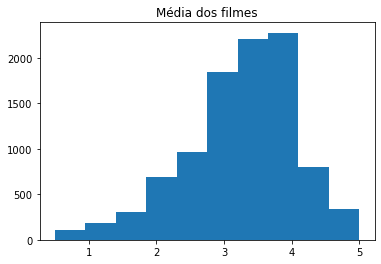

In [27]:
import matplotlib.pyplot as plt
plt.hist(media_por_filme)
plt.title("Média dos filmes")